# IMPORTING LIBRARIES

In [1]:
import cv2
import numpy as np
import types
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

# Loading a 512*512 image

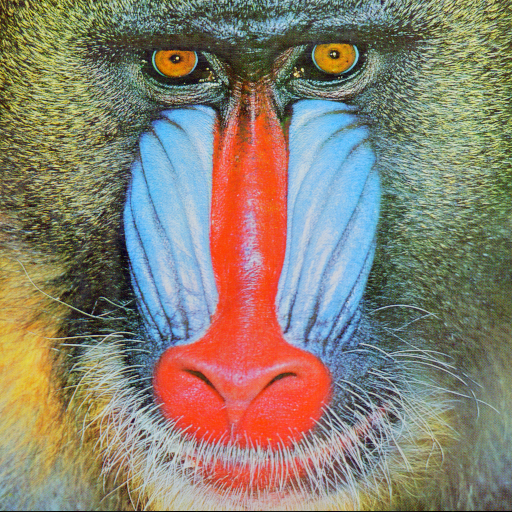

In [2]:
image=Image.open('baboon.png')
image

In [3]:
print(image.size)

(512, 512)


# CONVERTING SECRET MESSAGE TO BINARY

In [4]:
def strToBinary(s):
    bin_conv = []
 
    for c in s:
         
        ascii_val = ord(c)
        bin_conv.append(format(ascii_val,"08b"))
         
    return (''.join(bin_conv))

In [5]:
secret_message=strToBinary("IIITBangalore")
secret_message

'01001001010010010100100101010100010000100110000101101110011001110110000101101100011011110111001001100101'

In [6]:
len(secret_message)

104

# CONVERTING 0'S IN SECRET MSG AS -1 AND 1'S AS 1

In [7]:
sm=np.zeros(len(secret_message))
for i in range(len(secret_message)):
  if secret_message[i]=='0':
    sm[i]=-1
  else:
    sm[i]=1
sm.astype(int)

array([-1,  1, -1, -1,  1, -1, -1,  1, -1,  1, -1, -1,  1, -1, -1,  1, -1,
        1, -1, -1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1, -1, -1, -1,  1,
       -1, -1, -1, -1,  1, -1, -1,  1,  1, -1, -1, -1, -1,  1, -1,  1,  1,
       -1,  1,  1,  1, -1, -1,  1,  1, -1, -1,  1,  1,  1, -1,  1,  1, -1,
       -1, -1, -1,  1, -1,  1,  1, -1,  1,  1, -1, -1, -1,  1,  1, -1,  1,
        1,  1,  1, -1,  1,  1,  1, -1, -1,  1, -1, -1,  1,  1, -1, -1,  1,
       -1,  1])

In [8]:
## converting string to list
list1=[]
for i in secret_message:
    if i=='0':
     list1.append(str(-1))
    else:
     list1.append(str(1))
list1

['-1',
 '1',
 '-1',
 '-1',
 '1',
 '-1',
 '-1',
 '1',
 '-1',
 '1',
 '-1',
 '-1',
 '1',
 '-1',
 '-1',
 '1',
 '-1',
 '1',
 '-1',
 '-1',
 '1',
 '-1',
 '-1',
 '1',
 '-1',
 '1',
 '-1',
 '1',
 '-1',
 '1',
 '-1',
 '-1',
 '-1',
 '1',
 '-1',
 '-1',
 '-1',
 '-1',
 '1',
 '-1',
 '-1',
 '1',
 '1',
 '-1',
 '-1',
 '-1',
 '-1',
 '1',
 '-1',
 '1',
 '1',
 '-1',
 '1',
 '1',
 '1',
 '-1',
 '-1',
 '1',
 '1',
 '-1',
 '-1',
 '1',
 '1',
 '1',
 '-1',
 '1',
 '1',
 '-1',
 '-1',
 '-1',
 '-1',
 '1',
 '-1',
 '1',
 '1',
 '-1',
 '1',
 '1',
 '-1',
 '-1',
 '-1',
 '1',
 '1',
 '-1',
 '1',
 '1',
 '1',
 '1',
 '-1',
 '1',
 '1',
 '1',
 '-1',
 '-1',
 '1',
 '-1',
 '-1',
 '1',
 '1',
 '-1',
 '-1',
 '1',
 '-1',
 '1']

In [9]:
string1=""
for i in list1:
       string1+=i

secret_message=string1       
secret_message

'-11-1-11-1-11-11-1-11-1-11-11-1-11-1-11-11-11-11-1-1-11-1-1-1-11-1-111-1-1-1-11-111-1111-1-111-1-1111-111-1-1-1-11-111-111-1-1-111-11111-1111-1-11-1-111-1-11-11'

# converting image to np array

In [10]:
x_image=np.array(image)
print(x_image)

[[[164 150  71]
  [ 63  57  31]
  [ 75  43  10]
  ...
  [117 119  68]
  [141 170 101]
  [179 188 118]]

 [[120 125  62]
  [135  97  33]
  [ 55  35  23]
  ...
  [122 140  98]
  [136 159 128]
  [120 138  74]]

 [[ 99  74  31]
  [132 118  46]
  [ 60  41  36]
  ...
  [118  93  90]
  [ 87  91  77]
  [ 96  80  49]]

 ...

 [[121 148 155]
  [123 156 150]
  [124 150 139]
  ...
  [110  73  60]
  [ 90  93  70]
  [ 81  80  60]]

 [[126 169 168]
  [117 151 151]
  [121 136 133]
  ...
  [ 73  84  68]
  [ 99  69  86]
  [ 80  63  71]]

 [[  9  11  12]
  [ 10  12  11]
  [ 11  15  12]
  ...
  [  5   8   5]
  [  2   5   0]
  [  4   5   2]]]


In [11]:
print(x_image.shape)

(512, 512, 3)


# MAKING THE MODIFIED IMAGE WITH SECRET MSG IN IT

In [12]:
x_convert=np.ravel(x_image);
x_convert

array([164, 150,  71, ...,   4,   5,   2], dtype=uint8)

In [13]:
x_convert.shape

(786432,)

In [14]:
D=np.random.randn(104,786432)
v=np.linalg.norm(D)
D=D/v
D.shape

(104, 786432)

In [15]:
t2=np.matmul(D,x_convert)

In [16]:
#Calculatting pseudo inverse
D_inv=np.linalg.pinv(D)

In [17]:
print(t2.shape)

(104,)


In [18]:
#taking alpha as .000000009
t1=[i*0.000000009 for i in sm]

In [19]:
print(t1)

[-9e-09, 9e-09, -9e-09, -9e-09, 9e-09, -9e-09, -9e-09, 9e-09, -9e-09, 9e-09, -9e-09, -9e-09, 9e-09, -9e-09, -9e-09, 9e-09, -9e-09, 9e-09, -9e-09, -9e-09, 9e-09, -9e-09, -9e-09, 9e-09, -9e-09, 9e-09, -9e-09, 9e-09, -9e-09, 9e-09, -9e-09, -9e-09, -9e-09, 9e-09, -9e-09, -9e-09, -9e-09, -9e-09, 9e-09, -9e-09, -9e-09, 9e-09, 9e-09, -9e-09, -9e-09, -9e-09, -9e-09, 9e-09, -9e-09, 9e-09, 9e-09, -9e-09, 9e-09, 9e-09, 9e-09, -9e-09, -9e-09, 9e-09, 9e-09, -9e-09, -9e-09, 9e-09, 9e-09, 9e-09, -9e-09, 9e-09, 9e-09, -9e-09, -9e-09, -9e-09, -9e-09, 9e-09, -9e-09, 9e-09, 9e-09, -9e-09, 9e-09, 9e-09, -9e-09, -9e-09, -9e-09, 9e-09, 9e-09, -9e-09, 9e-09, 9e-09, 9e-09, 9e-09, -9e-09, 9e-09, 9e-09, 9e-09, -9e-09, -9e-09, 9e-09, -9e-09, -9e-09, 9e-09, 9e-09, -9e-09, -9e-09, 9e-09, -9e-09, 9e-09]


In [20]:
t=t1-t2

In [21]:
print(t)

[ -7.69841411  24.21617362 -13.13094554  13.97889307 -13.92931254
  -0.16918055  -6.50262846  -8.94148093  20.828353   -21.37913489
  15.23304023   5.22285449  -6.94872696  -2.57669899  -8.98445619
  -6.05864957   7.84913018   6.47264039  -9.0158259  -23.55886968
 -18.40013658  15.22416411  -5.81491187  -0.84647675  11.14396008
 -12.88801177 -23.39972501  15.5543294    9.19354371  -6.68891646
  -2.66553887   9.35400209   1.13233523   3.4008979   -0.14992818
  -7.12565779   3.30028261 -16.1206548   12.10989694 -17.4170056
 -20.35689726  -7.74788769  -4.18038736   7.79257435 -15.29625963
  -1.50234141  -9.15461928  -1.59075357 -10.14168988  -4.49720656
  28.56383771  -8.62022278   8.06898961 -13.23522405 -13.76903841
  11.80656657  -0.79824547  -1.34503185  17.76039938  -3.32440113
   5.41498956 -12.86219063  12.01796971 -18.39601832 -31.18391545
  18.0110838   -8.5217999   22.17112962  -4.27407403  -6.33106571
   1.83633222  -7.10477273   6.06973609  -7.99289198 -23.10423314
   1.858415

In [22]:
z=np.matmul(D_inv,t)

In [23]:
temp=x_convert+z
temp

array([164.07408129, 150.91263656,  71.69169801, ...,   3.654108  ,
         6.36048269,   1.68974386])

In [24]:
temp.shape

(786432,)

In [25]:
mod_i=temp.reshape((512,512,3))
print(mod_i)

[[[164.07408129 150.91263656  71.69169801]
  [ 63.14938465  54.80276245  29.569071  ]
  [ 74.49077469  43.16825329   9.19632534]
  ...
  [118.23558027 118.10758001  63.48750442]
  [143.84423552 171.91923178 102.51658128]
  [180.12325111 187.13862639 119.17788354]]

 [[117.36524208 127.49719818  63.332196  ]
  [134.7763063   94.73512913  33.93763863]
  [ 53.35083561  34.62051723  21.46046082]
  ...
  [118.99722978 140.19395291  96.88334706]
  [136.95632849 157.98264193 128.77597425]
  [120.67827665 137.66991672  71.09856886]]

 [[ 98.33497287  76.84224336  30.21887245]
  [133.6266166  119.6568666   43.83644025]
  [ 63.28218085  42.00157426  36.22834502]
  ...
  [116.63908806  94.72527021  92.30492133]
  [ 86.30353269  89.86854692  75.82126472]
  [ 94.95312711  78.84639961  51.13531201]]

 ...

 [[119.83948532 147.43960409 156.00794397]
  [122.93020251 154.3194927  154.92535828]
  [124.41358773 150.27306728 140.16077538]
  ...
  [109.92956383  72.50397129  57.27792781]
  [ 91.56998992  9

In [26]:
mod_i.astype(int)

array([[[164, 150,  71],
        [ 63,  54,  29],
        [ 74,  43,   9],
        ...,
        [118, 118,  63],
        [143, 171, 102],
        [180, 187, 119]],

       [[117, 127,  63],
        [134,  94,  33],
        [ 53,  34,  21],
        ...,
        [118, 140,  96],
        [136, 157, 128],
        [120, 137,  71]],

       [[ 98,  76,  30],
        [133, 119,  43],
        [ 63,  42,  36],
        ...,
        [116,  94,  92],
        [ 86,  89,  75],
        [ 94,  78,  51]],

       ...,

       [[119, 147, 156],
        [122, 154, 154],
        [124, 150, 140],
        ...,
        [109,  72,  57],
        [ 91,  93,  70],
        [ 81,  79,  59]],

       [[122, 171, 166],
        [117, 150, 148],
        [117, 136, 132],
        ...,
        [ 73,  85,  70],
        [ 99,  66,  86],
        [ 80,  64,  71]],

       [[  9,  12,  11],
        [  8,  11,  13],
        [ 11,  13,  11],
        ...,
        [  8,  10,   3],
        [  1,   6,  -1],
        [  3,   6,   1]]

In [27]:
modifiedimage=Image.fromarray((mod_i%256).astype(np.uint8))

In [28]:
modifiedimage.save('Modifiedbaboon.png')

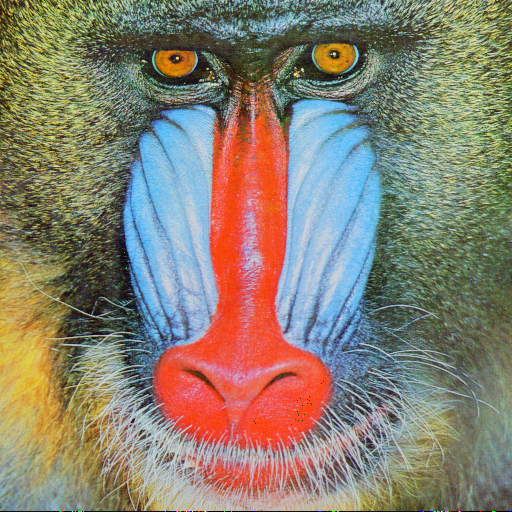

In [29]:
modifiedimage

# DECODING THE SECRET MESSAGE

In [30]:
#res=np.matmul(D,temp)

In [31]:
#y=np.sign(res)

In [32]:
#print(y)

In [33]:
#CHANGING -1 AS 0 AND 1 AS 1
#y=(y+1)//2
#y

In [34]:
#y=y.astype(int)

In [35]:
#l1=list(y)
#l1

In [36]:
#binary to decimal conversion
def btod(n):
  res=0
  for i in n:
    res=res*2+int(i)
  return res 

In [37]:
def Decode_Message(D,temp,alpha):
    res=np.matmul(D,temp)
    y=np.sign(res)
    y=(y+1)//2
    y=y.astype(int)
    l1=list(y)
    strng=""
    while(l1):
        char=""
        for i in range(8):
            char+=str(l1.pop(0))
        a=btod(char)
        strng+=chr(a)
    return strng


In [38]:
res=Decode_Message(D,temp,.000000009)
res

'IIITBangalore'